Résolution d'équations différentielles d'ordre 2
================================================

**Date:** lundi 24 janvier 2022



## Capacité numérique



-   Équations différentielles d’ordre supérieur ou égal à 2
    -   Transformer une équation différentielle d’ordre n en un système
        différentiel de n équations d’ordre 1
    -   Utiliser la fonction odeint de la bibliothèque scipy.integrate (sa
        spécification étant fournie).



## Modules



Conformément au programme, on utilise la fonction `odeint` du module
`scipy.integrate` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)) pour réaliser l'intégration
**numérique** d'une équation différentielle d'ordre 2.

Notons qu'on pourra lui préférer la fonction `solve_ivp` du même
module offrant davantage de possibilités ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)), en
particulier celle de déterminer les instants où certains évènements
sont réalisés.



In [1]:
%matplotlib inline

La ligne précédente ne doit apparaître que dans les notebooks
`Jupyter`, pas dans un fichier python.



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy.ma as ma

## Équation différentielle d'ordre 2



### Système d'équations différentielles d'ordre 1



La dynamique du point matériel amène à considérer des équations
différentielles d'ordre 2 de la forme:

$$
\frac{\mathrm{d}^2 x}{\mathrm{d} t^2}  = f\left(x,\frac{\mathrm{d} x}{\mathrm{d} t},t\right).
$$

Les systèmes de résolution numérique sont conçus pour résoudre (voir
par exemple la méthode d'Euler) des équations différentielles
d'ordre 1. On transforme donc

-   **une** équation différentielle d'ordre **2** dont l'inconnue est $x$
-   en un système de **2** équations différentielles d'ordre **1**, dont les
    inconnues sont $x$ et $x^\prime$,

en écrivant:

\begin{align*}
  \frac{\mathrm{d} x}{\mathrm{d} t}&= x^{\prime}\\
  \frac{\mathrm{d} x^\prime}{\mathrm{d} t} &= f(x,x^{\prime},t)
\end{align*}

Il ne reste alors plus qu'à intégrer numériquement ces deux équations
différentielles simultanément en utilisant, par exemple la méthode
d'Euler, ou un autre algorithme.



### Adimensionnement du système différentiel



Prenons l'exemple de l'oscillation d'un pendule simple de longueur
$\ell$, pour des amplitudes d'oscillation quelconques, en l'absence
de frottement. L'équation différentielle vérifiée par l'angle
$\theta$ est:

\begin{equation*}
  \frac{\mathrm{d} \theta}{\mathrm{d} t} +  \omega_{0}^{2} \sin(\theta) = 0,
\end{equation*}

avec $\omega_0^2 = g/\ell$. En introduisant la période des
oscillations de faible amplitude $T_0 = 2\pi/\omega_0$, on définit
la variable sans dimension $\tau = t/T_0$ pour réécrire l'équation
sous la forme:

\begin{equation*}
  \frac{\mathrm{d}^2 \theta}{\mathrm{d} \tau^2} +  (2 \pi)^2*\sin(\theta) = 0,
\end{equation*}

On utilisera alors $\theta^\prime = \frac{\mathrm{d}
\theta}{\mathrm{d} \tau}$ comme «vitesse adimensionnée».

Remarquons qu'il n'est pas nécessaire d'adimensionner l'angle
$\theta$ puisqu'il est déjà sans dimension.



### Utilisation d'`odeint`



On cherche à intégrer numériquement le système différentiel:

-   entre les instants $t_{\min}$ et $t_{\max}$
-   vérifiant les conditions initiales
    
    \begin{align*}
      \theta(t_{\min}) = \theta_{0}
      \frac{\mathrm{d} \theta}{\mathrm{d} t} (t_{\min}) = v_{0}//\ell
    \end{align*}

On doit pour cela définir le système différentiel, comme une fonction
calculant les taux de variation de $\theta$ et $\theta^\prime$
connaissant leurs valeurs à $\tau$ ainsi que l'instant $\tau$. On
peut définir la liste $u$ contenant $\theta$ et $\theta^\prime$.



In [1]:
def systdiff(u,tau):
    theta,thetaprime = u
    # d theta/d t = thetaprime
    # d thetaprime / dt = - sin(theta)
    return [thetaprime, - (2*np.pi)**2*np.sin(theta)]

Ici, le système différentiel ne dépend:

-   pas de la vitesse car on a négligé tout frottement,
-   pas explicitement du temps car il n'y a pas de forçage.

On définit ensuite les instants auxquels seront calculés $\theta$ et
$\theta^\prime$, en unité de $T_0$.



In [1]:
longueur = .4 #m
g0 = 9.8 #m/s^2
omega0 = np.sqrt(g0/longueur) #rad/s
T0 = 2*np.pi/omega0

tau_min = 0
tau_max = 5 #périodes T0
NombrePoints = 2000
tau = np.linspace(tau_min,tau_max,NombrePoints)
mask=ma.masked_greater(tau,1).mask #pour ne conserver que l'intervalle tau = 0:1, soit t = 0:T0
instants = tau*T0
instantsMasked = instants[~mask]

On définit ensuite les conditions initiales:



In [1]:
theta0 = np.pi/2 #angle initial (rad)
v0 =  2 #vitesse (m/s)
thetaprime0 = v0/(longueur*T0) # (rad)
CI = [theta0,thetaprime0]

On appelle enfin la fonction `odeint` qui prend pour arguments la
fonction `systdiff`, les conditions initiales et les instants
précédemment définis.



In [1]:
sol = odeint(systdiff,CI,tau)
angles = sol[:,0]
vitessesAngAdim = sol[:,1] #en unités de 1/T_0
vitessesAng = vitessesAngAdim/T0 #en unités de 1/T_0
vitesses = 100*vitessesAngAdim*longueur/T0 # en cm/s
anglesMasked = angles[~mask]
vitessesAngMasked = vitessesAng[~mask]
vitessesMasked = vitesses[~mask]

### Affichage des résultats



On peut tracer $\theta$ en fonction de $\tau$ ou
«redimensionner» pour le tracer en fonction de $t$.



# Out[39]:

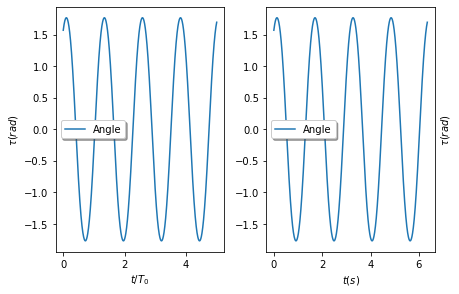

In [1]:
figtemporel,(axtempAdim,axtempDim) = plt.subplots(1,2) #pour avoir deux figures côte à côte
figtemporel.tight_layout()
axtempAdim.plot(tau,angles,label='Angle')
axtempAdim.set_xlabel(r"$t/T_0$")
axtempAdim.set_ylabel(r"$\tau(rad)$" )
axtempAdim.legend(loc='best',shadow=True)

axtempDim.plot(instants,angles,label='Angle')
axtempDim.set_xlabel(r"$t(s)$")
axtempDim.set_ylabel(r"$\tau(rad)$" )
axtempDim.yaxis.set_label_position("right")
axtempDim.legend(loc='best',shadow=True)

figtemporel.show()

Remarquons qu'ici la période n'est pas égale à $T_0$ puisque
l'approximation des oscillations de faible amplitude n'est pas
légitime.

On peut également tracer la trajectoire dans l'espace des phases en
traçant $\frac{\mathrm{d} \theta}{\mathrm{d} t}$ en fonction de
$\theta$. On ne la trace que sur une durée $T_0$: on observe ainsi
que la période est supérieure, pour cette amplitude, à $T_0$
puisqu'on n'effectue pas une oscillation complète en $T_0$.



# Out[50]:

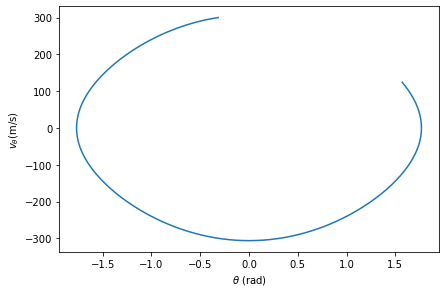

In [1]:
figphase,axphase = plt.subplots()
figphase.tight_layout()
axphase.plot(anglesMasked,vitessesMasked)
axphase.set_xlabel(r"$\theta$ (rad)")
axphase.set_ylabel(r"$v_\theta$(m/s)" )

figphase.show()

Remarquons que l'utilisation de la fonction `solve_ivp` permettrait de
déterminer directement la période puisque son argument `events`
permettrait de renvoyer la valeur de l'instant où $\dot{\theta}=0$
s'annule, soit, si l'objet a été lâché sans vitesse initiale, la durée
d'une demi-période.

Enfin, dans le cas d'un mouvement à $N$ degrés de libertés, on
utilisera un système de $2 N$ équations différentielles de degré
$1$. Pour un mouvement dans le plan $x,z$, on utilisera par
exemple les grandeurs $x,z,x^\prime, z^\prime$.



## Questions du DM06



### II.3.b



### II.3.c

